In [1]:
import tensorflow as tf
import tensorflow.keras as k
import matplotlib.pyplot as plt
import numpy as np
from datasets import load_flower_dataset

### PLot functions

In [2]:
def plot_scatter(X:np.ndarray, Y:np.ndarray):
    '''
    Show the scatter plot of flower dataset
    
    Parameters
    ----------
    X : numpy.ndarray [shape: (#features, #samples)]
        matrix of data; dtype: float64
    Y : numpy.ndarray [shape: (1, #samples)]
        array containing true labels 0 or 1; dtype: uint8 
    '''
    scatter=plt.scatter(X[0, :], X[1, :], c=Y, s=40, cmap=plt.cm.Spectral)
    plt.legend(*scatter.legend_elements(), loc="upper right", title="Classes")
    plt.xlabel('feature 1')
    plt.ylabel('feature 2')
    # plt.show()
    

def plot_decision_boundary(predict, X, Y):
    """
    Plot the decision boundary for logistic regression
    
    Parameters
    ----------
    predict : function
        predicted output; dtype=int8 
    parameters : dict
    X : numpy.ndarray [shape: (#features, #samples)]
        matrix of data; dtype: float64
    Y : numpy.ndarray [shape: (1, #samples)]
        array containing true labels 0 or 1; dtype: uint8
    """
    # Set min and max values and give it some padding
    x_min, x_max = X[0, :].min() - 1, X[0, :].max() + 1
    y_min, y_max = X[1, :].min() - 1, X[1, :].max() + 1
    h = 0.01
    # Generate a grid of points with distance h between them
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    # Predict the function value for the whole grid
    # Y = None argument is dumpy as not used when print_accuracy=False
    Z = predict(tf.constant(np.c_[xx.ravel(), yy.ravel()],dtype=tf.float32),  batch_size=xx.size, verbose=0)
    Z=tf.cast(Z > 0.5, "float32")
    Z = Z.numpy().reshape(xx.shape)
    # Plot the contour and training examples
    plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral)
    plot_scatter(X,Y)

### Import data

(500, 2) (500, 1)


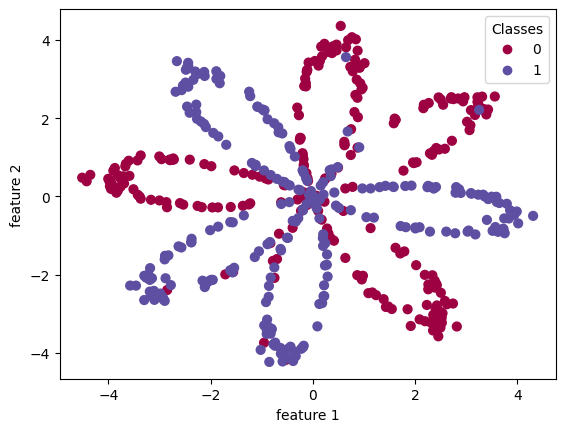

In [3]:
X_np,Y_np = load_flower_dataset( petals=4, noise=0.2, angle=30)
X=tf.constant(X_np.T, dtype=tf.float32)
Y=tf.constant(Y_np.reshape(-1,1), dtype=tf.float32)
print(X.shape, Y.shape)
plot_scatter(X_np,Y_np)

### L Layer Neural Network Model

In [4]:
def L_layer_model(train_X, train_Y, layers_dims, learning_rate=0.0075, num_epochs=2000, activation_L_1="relu", activation_L="sigmoid", print_cost=False):
    """
    L layer neural network with different activation function on output layer option.
    
    Parameters
    ----------
    train_X : Tensor [shape: (#samples, #features)]; dtype=tf.float32
    train_Y : Tensor [shape: (#samples, 1)]; dtype=tf.float32
    layers_dims : list of int; list of number of nodes in each layer

    Returns
    -------
    forward : trained model
    costs : list of cost every 100 iteration
    """
    L = len(layers_dims) # number of layers in the network

    ## Create the model
    np.random.seed(3)
    forward = k.models.Sequential()
    # layers initialized; [1:L-1] X activation_L_1 + [L] X activation_L
    for l in range(1, L-1):
        init_W = (np.random.randn(layers_dims[l], layers_dims[l-1]) / np.sqrt(layers_dims[l-1])).T.astype(np.float32)
        forward.add( k.layers.Dense(units=layers_dims[l], activation=activation_L_1, input_shape=(layers_dims[l-1],),
                                    kernel_initializer=tf.constant_initializer(init_W),
                                    bias_initializer="zeros") )
        #  kernel_initializer=k.initializers.RandomNormal(mean=0.0, stddev=1.0,seed=3)
    init_W = (np.random.randn(layers_dims[-1], layers_dims[-2]) / np.sqrt(layers_dims[-2])).T.astype(np.float32)
    forward.add( k.layers.Dense(units=layers_dims[-1], activation=activation_L, input_shape=(layers_dims[-2],),
                                kernel_initializer=tf.constant_initializer(init_W),
                                bias_initializer="zeros") )
    # forward.summary()

    ## Compile the model
    forward.compile(
        optimizer=k.optimizers.Adam(learning_rate=learning_rate),
        loss=tf.keras.losses.BinaryCrossentropy(),
        metrics=[k.metrics.BinaryAccuracy()],
    )

    class print_on_end(k.callbacks.Callback):
        def __init__(self, show_epoch=100):
            self.show_epoch = show_epoch
        def on_epoch_end(self, epoch, logs=None):
            if epoch % self.show_epoch == 0 or epoch==self.params['epochs']-1:
                print(f"{epoch+1}/{self.params['epochs']}    loss: {logs['loss']},    binary_accuracy: {logs['binary_accuracy']*100}%")
    if print_cost:
        callbacks=[print_on_end(100)]
    else:
        callbacks=[]

    ## Train the model
    hist = forward.fit(train_X, train_Y, epochs=num_epochs, shuffle=False, batch_size=train_X.shape[0],
                     verbose=0,callbacks=callbacks)
    
    return hist


def plot_costs(costs, learning_rate):
    plt.plot(np.squeeze(costs))
    plt.ylabel('cost')
    plt.xlabel('iterations (per hundreds)')
    plt.title("Learning rate =" + str(learning_rate))
    plt.show()

### Detailed info, plots demo

1/2000    loss: 0.812698483467102,    binary_accuracy: 46.00000083446503%
101/2000    loss: 0.29725244641304016,    binary_accuracy: 90.20000100135803%
201/2000    loss: 0.22785967588424683,    binary_accuracy: 92.00000166893005%
301/2000    loss: 0.20907947421073914,    binary_accuracy: 92.40000247955322%
401/2000    loss: 0.19926513731479645,    binary_accuracy: 92.79999732971191%
501/2000    loss: 0.19380135834217072,    binary_accuracy: 92.79999732971191%
601/2000    loss: 0.18998952209949493,    binary_accuracy: 93.00000071525574%
701/2000    loss: 0.18664003908634186,    binary_accuracy: 93.00000071525574%
801/2000    loss: 0.18386822938919067,    binary_accuracy: 93.19999814033508%
901/2000    loss: 0.18133263289928436,    binary_accuracy: 93.19999814033508%
1001/2000    loss: 0.17884258925914764,    binary_accuracy: 93.4000015258789%
1101/2000    loss: 0.17627616226673126,    binary_accuracy: 93.80000233650208%
1201/2000    loss: 0.174319788813591,    binary_accuracy: 93.599998

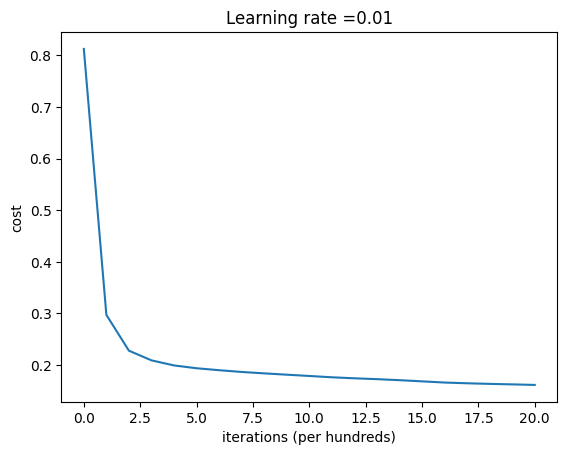

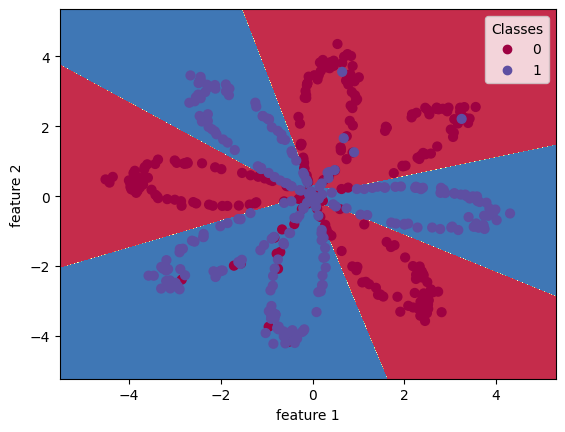

In [5]:
num_epochs=2000; activation_L_1="relu"; activation_L="sigmoid"
learning_rate = 0.01; layers_dims=[X.shape[-1],6,6, 1]

nn_model = L_layer_model(X, Y, layers_dims, learning_rate, num_epochs, activation_L_1, activation_L, print_cost=True)
Y_pred = nn_model.model.predict(X, batch_size=X.shape[0], verbose=0)
acc = k.metrics.binary_accuracy(tf.transpose(Y), tf.transpose(Y_pred), threshold=0.5)
print(f"train accuracy: { acc.numpy().item() *100 } %")
costs = nn_model.history["loss"][0::100]
costs.append(nn_model.history['loss'][-1])
plot_costs(costs, learning_rate)
plot_decision_boundary(nn_model.model.predict, X_np, Y_np)

### Single Neuron Model Run

1/2000    loss: 1.5223278999328613,    binary_accuracy: 31.999999284744263%
101/2000    loss: 0.7630854249000549,    binary_accuracy: 53.39999794960022%
201/2000    loss: 0.6634265184402466,    binary_accuracy: 53.60000133514404%
301/2000    loss: 0.6622133255004883,    binary_accuracy: 47.40000069141388%
401/2000    loss: 0.6622120141983032,    binary_accuracy: 47.200000286102295%
501/2000    loss: 0.6622119545936584,    binary_accuracy: 47.200000286102295%
601/2000    loss: 0.6622119545936584,    binary_accuracy: 47.200000286102295%
701/2000    loss: 0.6622119545936584,    binary_accuracy: 47.200000286102295%
801/2000    loss: 0.6622119545936584,    binary_accuracy: 47.200000286102295%
901/2000    loss: 0.6622119545936584,    binary_accuracy: 47.200000286102295%
1001/2000    loss: 0.6622119545936584,    binary_accuracy: 47.200000286102295%
1101/2000    loss: 0.6622119545936584,    binary_accuracy: 47.200000286102295%
1201/2000    loss: 0.6622119545936584,    binary_accuracy: 47.20000

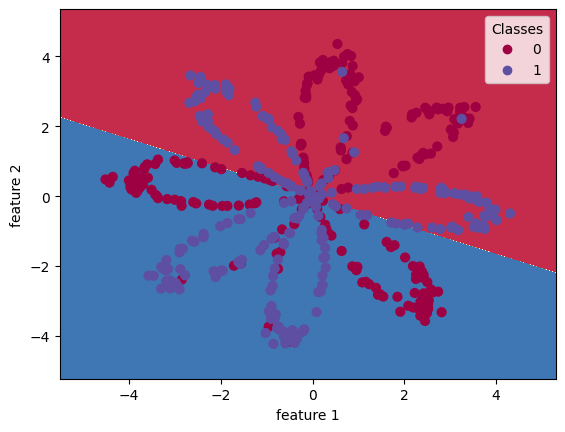

In [6]:
num_epochs=2000; activation_L_1="relu"; activation_L="sigmoid"
learning_rate = 0.01; layers_dims=[X.shape[-1], 1]

nn_model = L_layer_model(X, Y, layers_dims, learning_rate, num_epochs, activation_L_1, activation_L, print_cost=True)
Y_pred = nn_model.model.predict(X, batch_size=X.shape[0], verbose=0)
acc = k.metrics.binary_accuracy(tf.transpose(Y), tf.transpose(Y_pred), threshold=0.5)
print(f"train accuracy: { acc.numpy().item() *100 } %")
plot_decision_boundary(nn_model.model.predict, X_np, Y_np)

### 2 Layers (or 1 hidden layer) Neural Network with 1 neuron in output layer

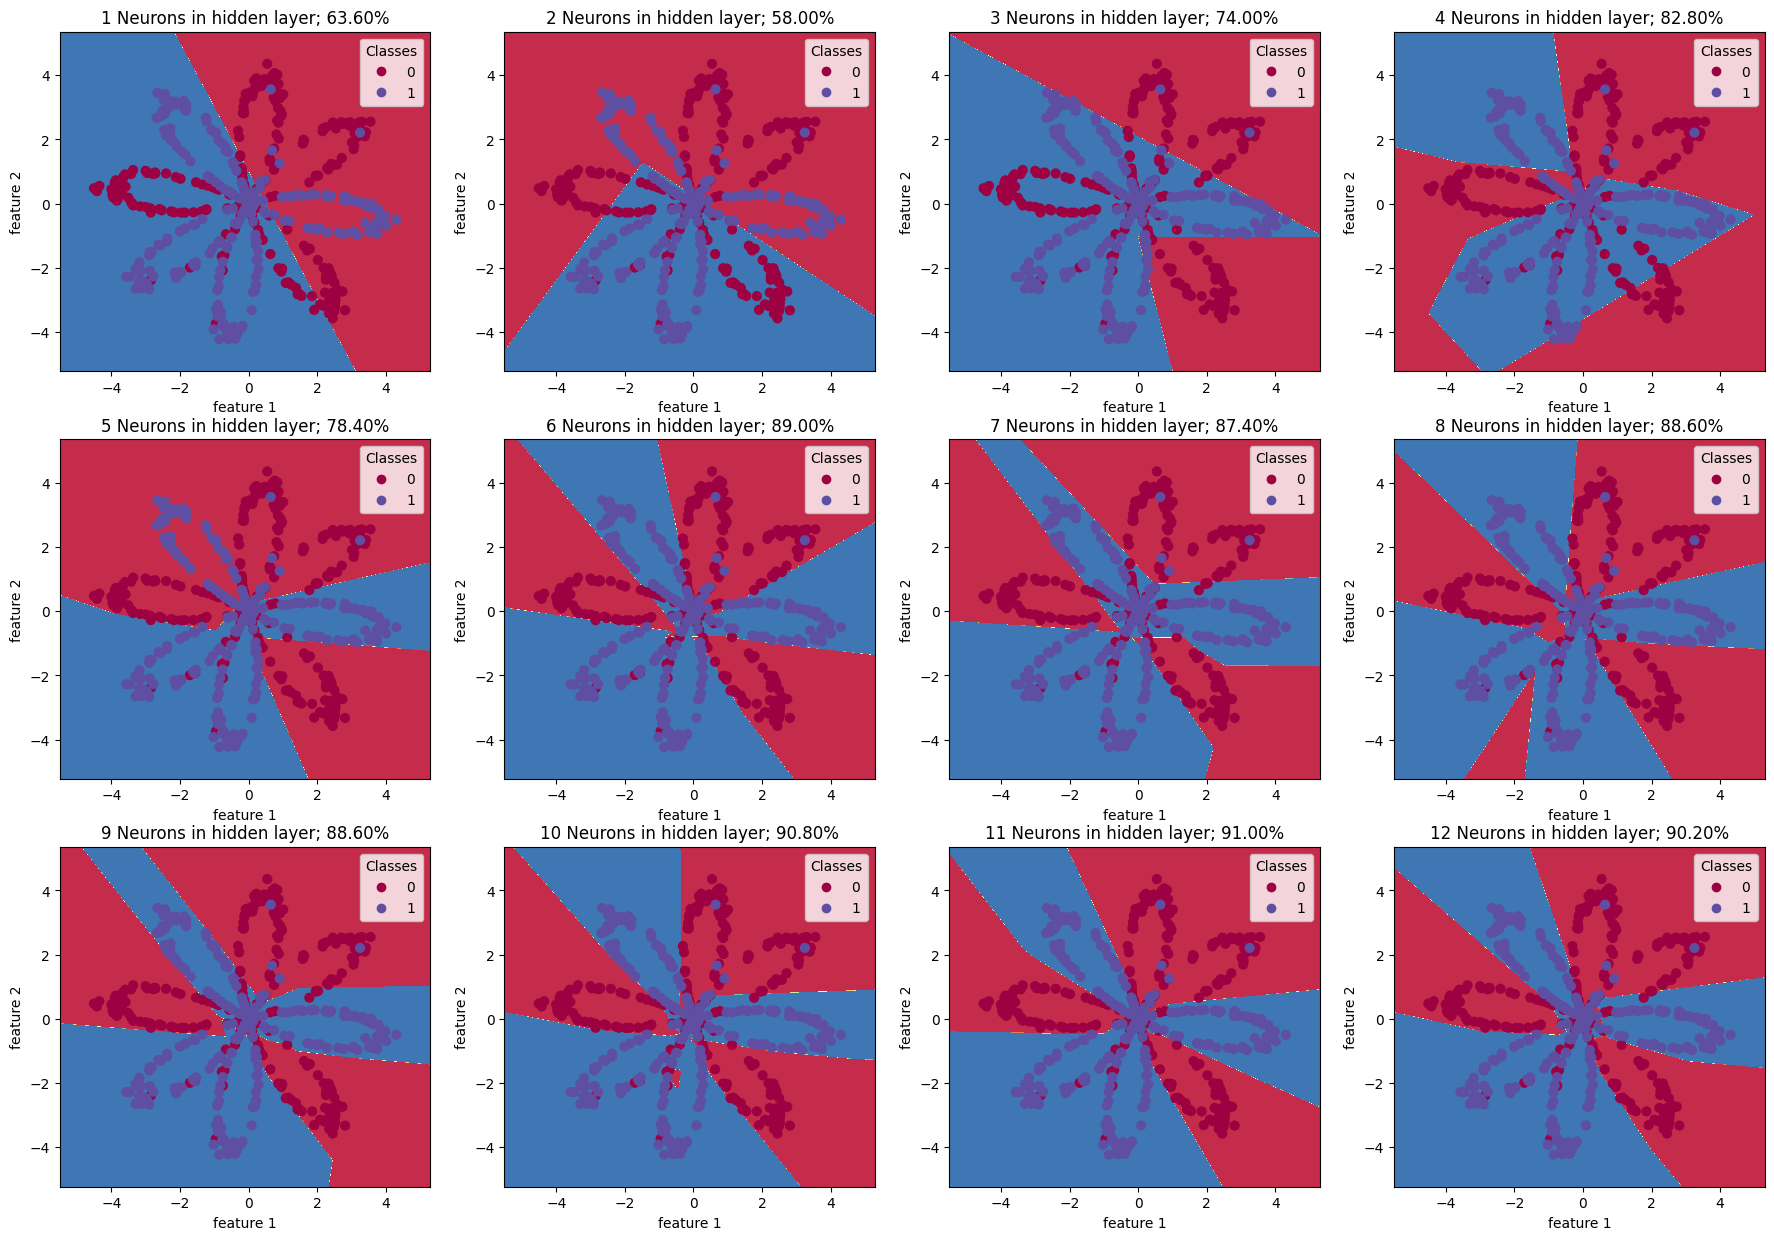

In [7]:
num_epochs=2000; activation_L_1="relu"; activation_L="sigmoid"
learning_rate = 0.01; layers_dims=[X.shape[-1],1, 1]
plt.rcParams['figure.figsize'] = (22.0, 15.0) # width, height
for i in range(1,13):
    layers_dims=[X.shape[-1],i, 1]
    plt.subplot(3, 4, i)
    nn_model = L_layer_model(X, Y, layers_dims, learning_rate, num_epochs, activation_L_1, activation_L, print_cost=False)
    Y_pred = nn_model.model.predict(X, batch_size=X.shape[0], verbose=0)
    acc = k.metrics.binary_accuracy(tf.transpose(Y), tf.transpose(Y_pred), threshold=0.5)
    plot_decision_boundary(nn_model.model.predict, X_np, Y_np)
    plt.title(f"{i} Neurons in hidden layer; {acc.numpy().item()*100:.2f}%")


### 3 Layers (or 2 hidden layer) Neural Network with 1 neuron in output layer

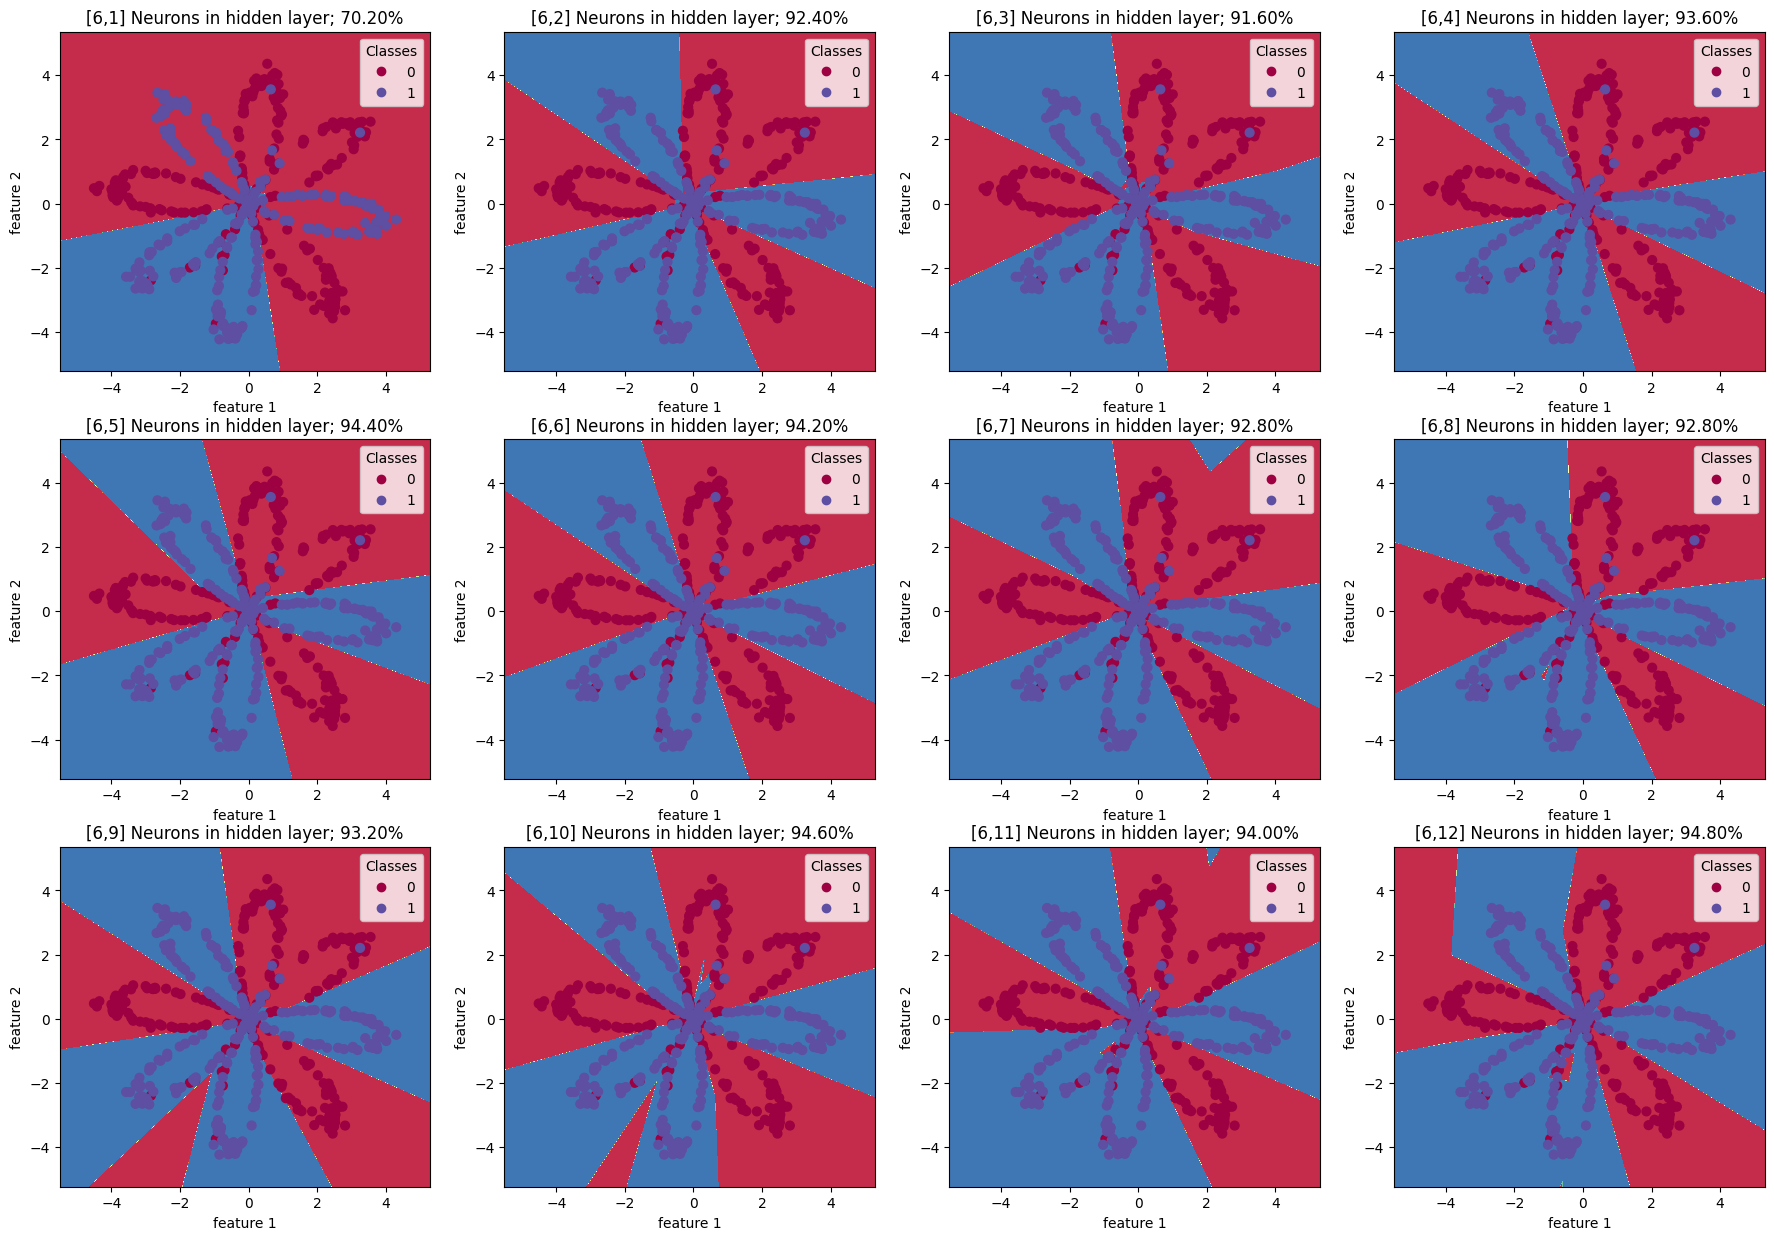

In [8]:
num_epochs=2000; activation_L_1="relu"; activation_L="sigmoid"
learning_rate = 0.01; layers_dims=[X.shape[-1],6,1, 1]
plt.rcParams['figure.figsize'] = (22.0, 15.0) # width, height
for i in range(1,13):
    layers_dims=[X.shape[-1],6, i, 1]
    plt.subplot(3, 4, i)
    nn_model = L_layer_model(X, Y, layers_dims, learning_rate, num_epochs, activation_L_1, activation_L, print_cost=False)
    Y_pred = nn_model.model.predict(X, batch_size=X.shape[0], verbose=0)
    acc = k.metrics.binary_accuracy(tf.transpose(Y), tf.transpose(Y_pred), threshold=0.5)
    plot_decision_boundary(nn_model.model.predict, X_np, Y_np)
    plt.title(f"[6,{i}] Neurons in hidden layer; {acc.numpy().item()*100:.2f}%")

### 4 Layers (or 3 hidden layer) Neural Network with 1 neuron in output layer

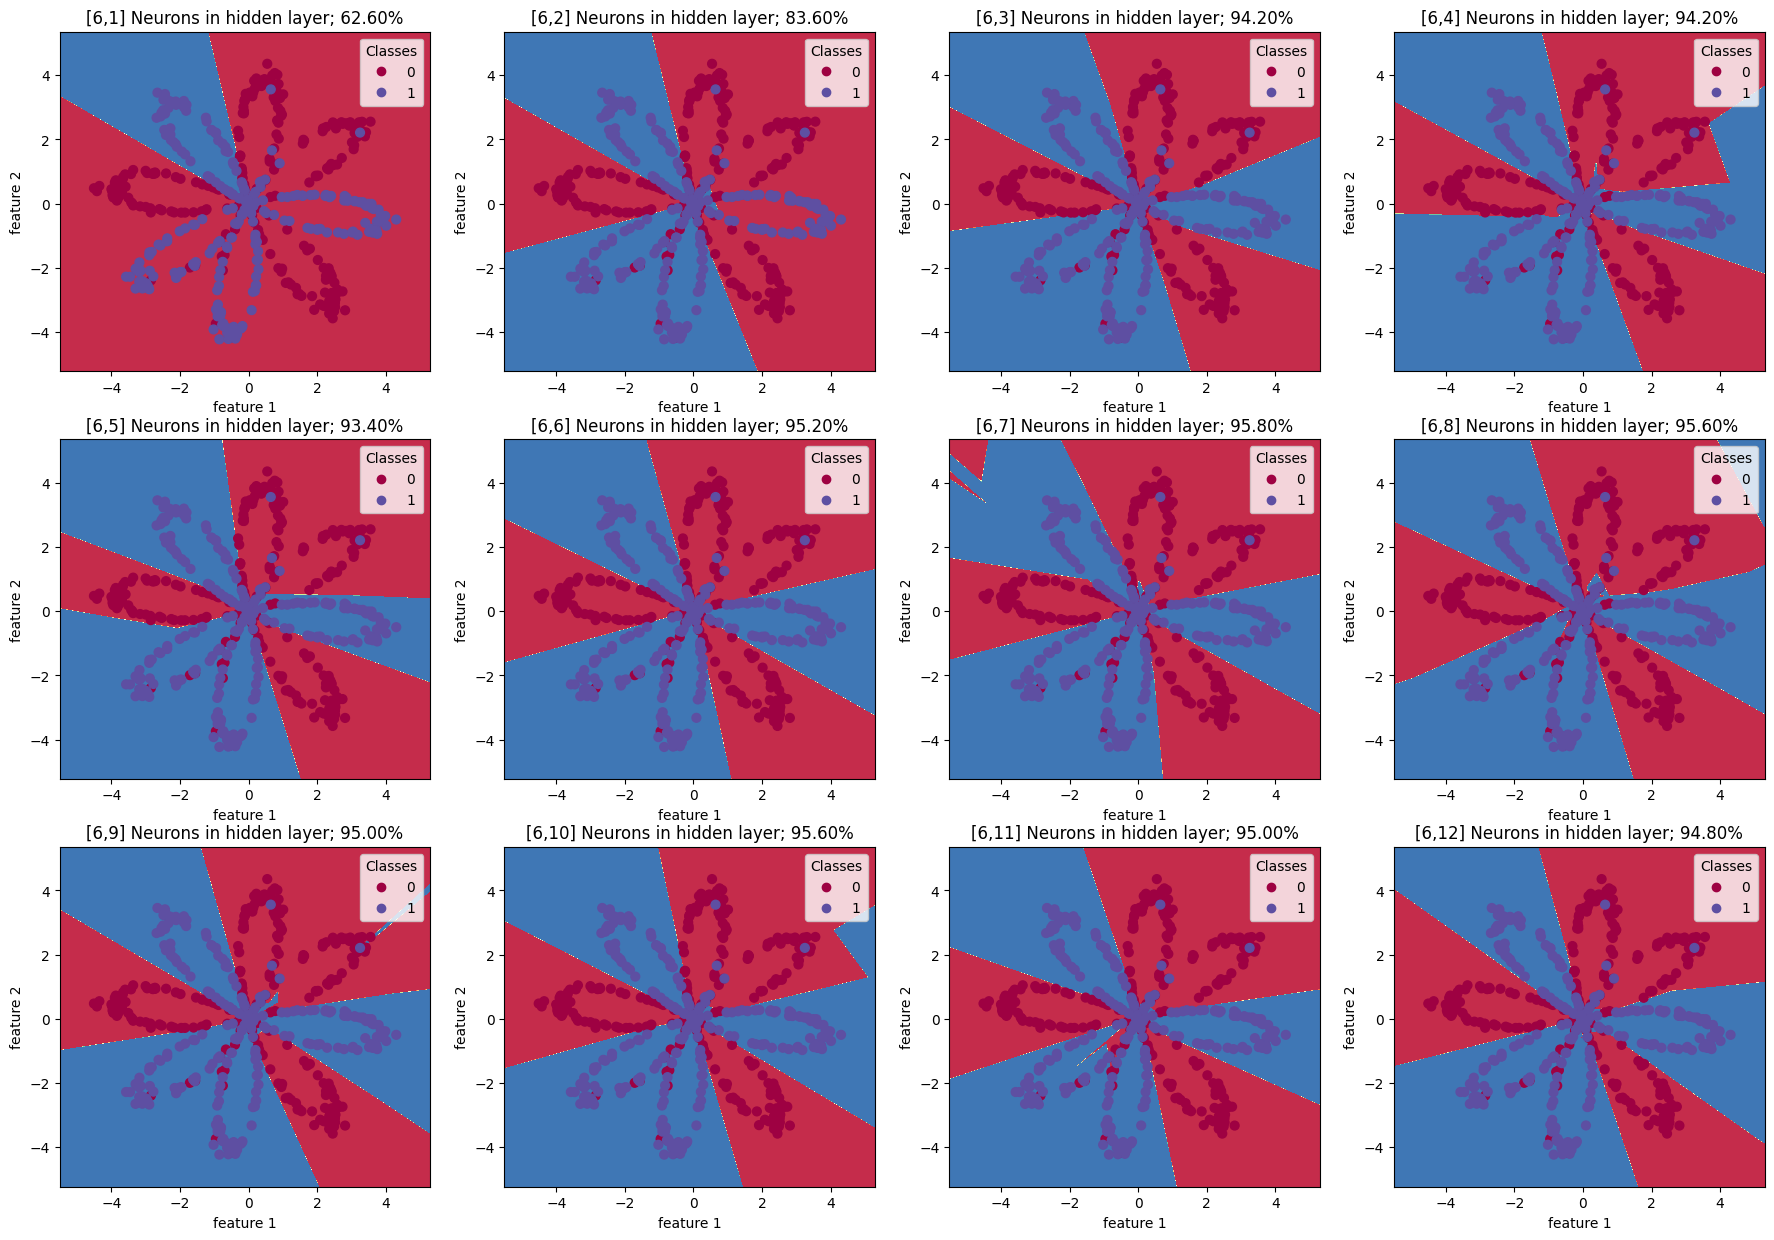

In [9]:
num_epochs=2000; activation_L_1="relu"; activation_L="sigmoid"
learning_rate = 0.01; layers_dims=[X.shape[-1],6,6,1, 1]
plt.rcParams['figure.figsize'] = (22.0, 15.0) # width, height
for i in range(1,13):
    layers_dims=[X.shape[-1],6,6, i, 1]
    plt.subplot(3, 4, i)
    nn_model = L_layer_model(X, Y, layers_dims, learning_rate, num_epochs, activation_L_1, activation_L, print_cost=False)
    Y_pred = nn_model.model.predict(X, batch_size=X.shape[0], verbose=0)
    acc = k.metrics.binary_accuracy(tf.transpose(Y), tf.transpose(Y_pred), threshold=0.5)
    plot_decision_boundary(nn_model.model.predict, X_np, Y_np)
    plt.title(f"[6,{i}] Neurons in hidden layer; {acc.numpy().item()*100:.2f}%")

### Conclusion

3 layer neural networks in general give best results and adding more layers is increasing accuracy by much but probably overfitting.

Text(0.5, 1.0, '[6,6] Neurons in hidden layer; 94.20%')

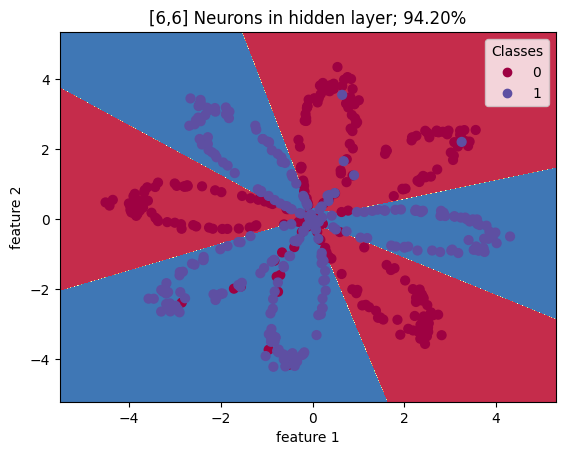

In [10]:
num_epochs=2000; activation_L_1="relu"; activation_L="sigmoid"
learning_rate = 0.01; layers_dims=[X.shape[-1],6,6, 1]
plt.rcParams["figure.figsize"] = plt.rcParamsDefault["figure.figsize"]
nn_model = L_layer_model(X, Y, layers_dims, learning_rate, num_epochs, activation_L_1, activation_L, print_cost=False)
Y_pred = nn_model.model.predict(X, batch_size=X.shape[0], verbose=0)
acc = k.metrics.binary_accuracy(tf.transpose(Y), tf.transpose(Y_pred), threshold=0.5)
# print(f"train accuracy: { acc.numpy().item() *100 } %")
# costs = nn_model.history["loss"][0::100]
# costs.append(nn_model.history['loss'][-1])
# plot_costs(costs, learning_rate)
plot_decision_boundary(nn_model.model.predict, X_np, Y_np)
plt.title(f"[6,6] Neurons in hidden layer; {acc.numpy().item()*100:.2f}%")